In [22]:
from typing import Annotated, List
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random
from typing_extensions import TypedDict

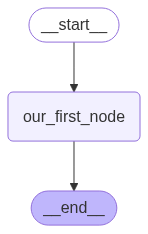

d:\ML\Udemy_Agentic AI\agents\4_langgraph\myvenv\Lib\site-packages\gradio\chat_interface.py:339: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


* Running on local URL:  http://127.0.0.1:7868
* To create a public link, set `share=True` in `launch()`.


{'messages': [{'role': 'assistant', 'content': "I'm fine, thank you!"}]}


Traceback (most recent call last):
  File "d:\ML\Udemy_Agentic AI\agents\4_langgraph\myvenv\Lib\site-packages\gradio\queueing.py", line 626, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
    )
    ^
  File "d:\ML\Udemy_Agentic AI\agents\4_langgraph\myvenv\Lib\site-packages\gradio\route_utils.py", line 322, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<11 lines>...
    )
    ^
  File "d:\ML\Udemy_Agentic AI\agents\4_langgraph\myvenv\Lib\site-packages\gradio\blocks.py", line 2220, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<8 lines>...
    )
    ^
  File "d:\ML\Udemy_Agentic AI\agents\4_langgraph\myvenv\Lib\site-packages\gradio\blocks.py", line 1729, in call_function
    prediction = await fn(*processed_input)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File 

In [21]:
class State(TypedDict):
    messages: list


graph_builder = StateGraph(State)


def our_first_node(old_state: State) -> State:
    message = random.choice(["Hello, how are you?", "I'm fine, thank you!", "What's your name?", "My name is John"])
    messages = [{"role": "assistant", "content": message}]
    new_state = State(messages=messages)
    return new_state

graph_builder.add_node("our_first_node", our_first_node)

graph_builder.add_edge(START, "our_first_node")

graph_builder.add_edge("our_first_node", END)

graph = graph_builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))


def run_graph(user_input:str, history):
    message = {"role": "user", "content": user_input}
    messages = [message]
    state = State(messages=messages)
    result = graph.invoke(state)
    print(result)
    return result["messages"][-1].content

gr.ChatInterface(run_graph).launch()



